<a href="https://colab.research.google.com/github/Nick-Azzarano/Machine-Learning-Practice/blob/main/Spring2025/In-Class_Problems/ML25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, torchvision
from torchvision.io import read_image
from torchvision import transforms

In [51]:
torch.cuda.is_available()

False

In [54]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
!wget https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif

--2025-04-17 20:02:49--  https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/lena_gray.gif
Resolving www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)... 141.201.2.14
Connecting to www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)|141.201.2.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264598 (258K) [image/gif]
Saving to: ‘lena_gray.gif’

lena_gray.gif       100%[===================>] 258.40K   538KB/s    in 0.5s    

2025-04-17 20:02:50 (538 KB/s) - ‘lena_gray.gif’ saved [264598/264598]



In [3]:
from PIL import Image

In [4]:
im = Image.open('lena_gray.gif').convert('L')
# im = Image.open('lena_gray.gif') #.convert('L')
#im = Image.open('five.png').convert('L')

In [5]:
#gray_image = torchvision.transforms.Grayscale()(im)
gray_image = torchvision.transforms.Grayscale()(im)

In [6]:
#im.mode

In [7]:
import numpy as np

In [8]:
im = np.array(im)

In [9]:
import matplotlib.pyplot as plt

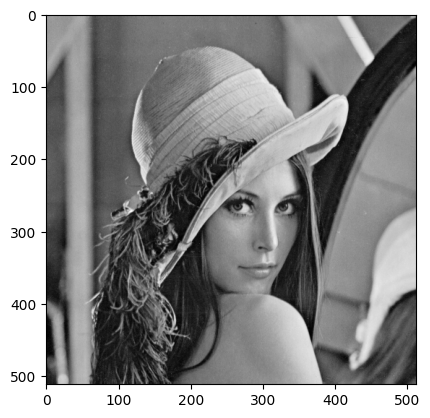

In [10]:
plt.imshow(im, cmap='gray')

In [11]:
np.array(im).shape

(512, 512)

In [12]:
kernel = torch.tensor([
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
    ]).to(torch.float)
#kernel = 0.2*torch.ones(3,3)

In [13]:
kernel

tensor([[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]])

In [14]:
# kernel = 0.2*torch.ones(3,3)
# kernel

In [15]:
import torch.nn as nn

In [16]:
from torch.nn.functional import conv2d

In [17]:
conv = conv2d(torch.tensor(im, dtype=torch.float).unsqueeze(0).unsqueeze(0), kernel.unsqueeze(0).unsqueeze(0))

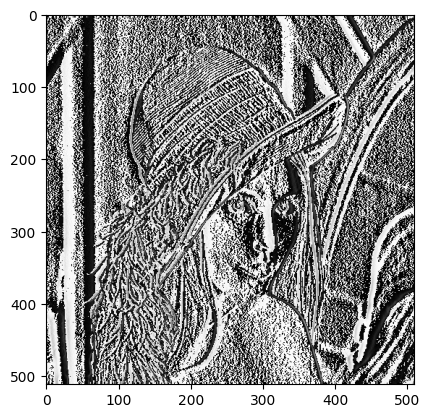

In [18]:
plt.imshow(im[:,:-2]-im[:,2:], cmap='gray',vmin=0, vmax=255)

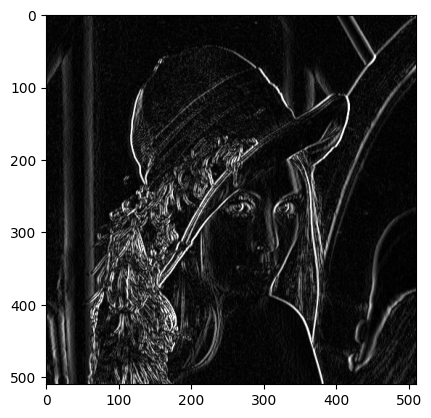

In [19]:
plt.imshow(conv.abs().squeeze(0).permute(1,2,0), cmap='gray', vmin=0, vmax=255)

In [20]:
!wget https://raw.githubusercontent.com/hse-ds/iad-deep-learning/master/2023/seminars/03.%20Image%20Classification/filter_viz.py

--2025-04-17 20:02:52--  https://raw.githubusercontent.com/hse-ds/iad-deep-learning/master/2023/seminars/03.%20Image%20Classification/filter_viz.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3188 (3.1K) [text/plain]
Saving to: ‘filter_viz.py’

filter_viz.py       100%[===================>]   3.11K  --.-KB/s    in 0s      

2025-04-17 20:02:52 (32.2 MB/s) - ‘filter_viz.py’ saved [3188/3188]



In [21]:
from filter_viz import plot_filters

In [22]:
import torchvision.transforms.v2 as transforms

In [29]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.ToDtype(torch.float32, scale = True),
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),

    ]
)

cifar_train = torchvision.datasets.CIFAR10(
    root="./cifar", train=True, download=True, transform=transform
)
cifar_val = torchvision.datasets.CIFAR10(
    root="./cifar", train=False, download=True, transform=transform
)

In [30]:
cifar_train[70][0].shape

torch.Size([3, 32, 32])

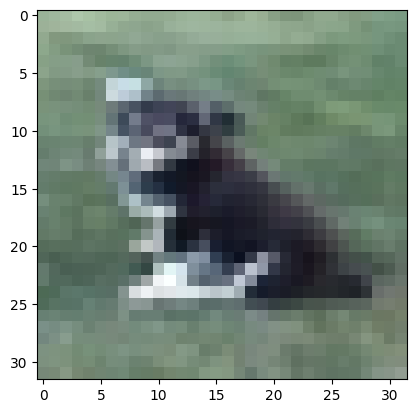

In [31]:
plt.imshow(cifar_train[70][0].permute(1,2,0)*torch.tensor([0.247, 0.243, 0.261])+torch.tensor([0.4914, 0.4822, 0.4465]))

In [32]:
cifar_train[70][1]

5

In [33]:
train_dataloader = torch.utils.data.DataLoader(
    cifar_train, batch_size=32, shuffle=True, num_workers=2
)
val_dataloader = torch.utils.data.DataLoader(
    cifar_val, batch_size=32, shuffle=False, num_workers=2
)

In [35]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    #img = img * torch.tensor([0.247, 0.243, 0.261])+torch.tensor([0.4914, 0.4822, 0.4465]) # / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0))*np.array([0.247, 0.243, 0.261])+np.array([0.4914, 0.4822, 0.4465]))


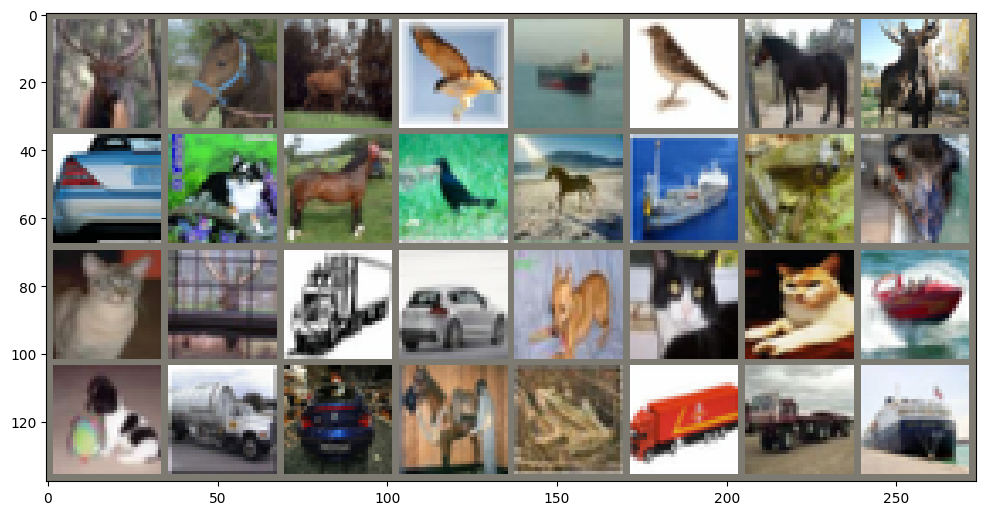

In [36]:
images, labels = next(iter(train_dataloader))

plt.figure(figsize=(12, 12))
# create grid of images
img_grid = torchvision.utils.make_grid(images)
# show images
matplotlib_imshow(img_grid, one_channel=False)

In [39]:
import torch.nn.functional as F

In [40]:
class MyModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.VGG = nn.Sequential(nn.Conv2d(3,16,3, padding=1), nn.ReLU(), nn.Conv2d(16,16,5, padding=2), nn.ReLU(), nn.MaxPool2d(2,2))
    self.fc1 = nn.Linear(16**3, 128)
    self.fc2 = nn.Linear(128,10)
    self.flat = nn.Flatten()

  def forward(self, x):
    x = self.VGG(x)
    x = self.flat(x)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x



In [41]:
model = MyModel()

In [ ]:
# move the model to the GPU, if we are actually running using the GPU
model.to(device)

In [44]:
model.forward(torch.zeros(2, 3, 32, 32))
# 2 images with 3 channels of shape 32x32

tensor([[-0.0698, -0.0203, -0.0956, -0.0521, -0.0165,  0.0335, -0.0520,  0.0110,
         -0.0803, -0.0036],
        [-0.0698, -0.0203, -0.0956, -0.0521, -0.0165,  0.0335, -0.0520,  0.0110,
         -0.0803, -0.0036]], grad_fn=<AddmmBackward0>)

In [ ]:
model.forward(torch.zeros(2, 3, 32, 32).to(device))
# 2 images with 3 channels of shape 32x32

In [46]:
from torch.optim import Adam

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters())

In [48]:
from tqdm import tqdm

In [50]:
# for epoch in range(10):
#   for x, y in tqdm(train_dataloader):
#     y_pred = model.forward(x)
#     loss = criterion(y_pred, y)
#     loss.backward()
#     optimizer.step()
#     optimizer.zero_grad()
#   with torch.no_grad():
#     acc = []
#     for x,y in val_dataloader:
#       y_pred = model.forward(x).argmax(-1)
#       acc.append((y_pred == y).sum().item()/len(y))
#   print(loss.item(), np.mean(acc))

 95%|█████████▌| 1485/1563 [01:31<00:04, 16.28it/s]


KeyboardInterrupt: 

In [ ]:
for epoch in range(10):
  model.train()  # TRAIN MODE
  for x, y in tqdm(train_dataloader):
    y_pred = model.forward(x.to(device))  # TO DEVICE !!!!
    loss = criterion(y_pred, y.to(device))  # TO DEVICE !!!!
    loss.backward()
    loss = loss.detach()  # LOSS DETACH
    optimizer.step()
    optimizer.zero_grad()
  with torch.no_grad():
    model.eval()  # EVAL MODE
    acc = []
    for x,y in val_dataloader:
      y_pred = model.forward(x.to(device)).argmax(-1)   # TO DEVICE !!!
      acc.append((y_pred.to('cpu') == y).sum().item()/len(y))   # TO CPU !!!
  print(loss.item(), np.mean(acc))  # When we call loss.item() it takes the value of this loss and moves it from GPU to CPU.
  # To help with efficiency and apply concurrency, we can use     loss.detach()

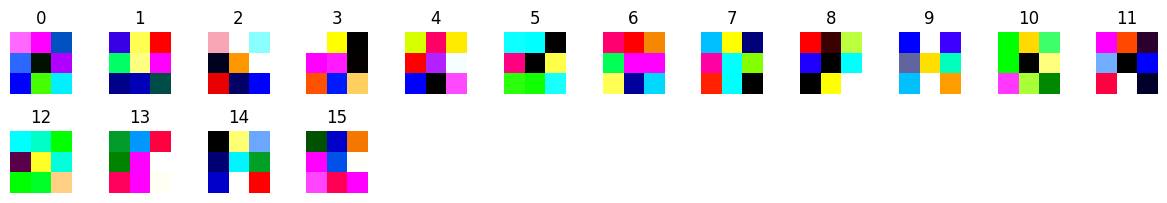

In [ ]:
plot_filters(model.VGG[0], single_channel=False)

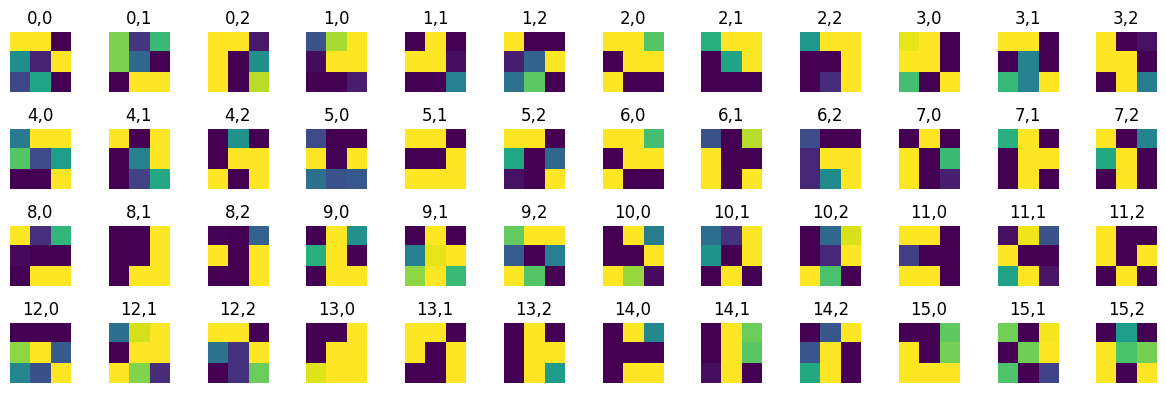

In [ ]:
plot_filters(model.VGG[0], single_channel=True)

In [55]:
import albumentations as A

In [56]:
# albumentations helps with creating variety in the dataset

In [58]:
!wget https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/Pine.png

--2025-04-17 20:42:24--  https://www.cosy.sbg.ac.at/~pmeerw/Watermarking/Pine.png
Resolving www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)... 141.201.2.14
Connecting to www.cosy.sbg.ac.at (www.cosy.sbg.ac.at)|141.201.2.14|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-04-17 20:42:25 ERROR 404: Not Found.



In [59]:
im = Image.open('Pine.png').convert('RGB')  # MAKE SURE TO USE .convert('RGB') to ensure an image with only 3 channels

FileNotFoundError: [Errno 2] No such file or directory: 'Pine.png'

In [ ]:
im = transforms.ToImage(im)
im.shape

In [ ]:
plt.imshow(im.permute(1,2,0))

In [ ]:
MyTransform = A.Compose([
    A.RandomResizedCrop(height=128, width=128),
    A.Rotate(limit=10),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])